<a href="https://colab.research.google.com/github/rajkhatana/Khatana/blob/master/RAMBABOO_KHATANA_190608_kerasbasics_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Basics
We will learn about
* Dense layers
* Categorical cross-entropy

A toy example to show how to train a classifier with Keras and use it. The data comes from three gaussian distributions.

In [0]:
## DATA GENERATION
import numpy as np
np.random.seed(10)
def generateX(cls):
    '''
    Inputs:
        cls: class {0, 1, 2}
    Outputs:
        x: a sample from cls; a np array of shape (2,)
    '''
    assert cls in [0,1,2]
    if cls==0:
        x = np.random.normal(np.array([0,0]),100)
    elif cls==1:
        x = np.random.normal(np.array([200,200]),100)
    elif cls==2:
      x = np.random.normal(np.array([-200,200]),100)
    return x
Nx = 2 # shape of a sample is (2,)
Ny = 3 # 3 classes

Could you write a function to generate N samples from class 0 and N samples from class 1?

In [0]:
def generateXY(N):
    '''
    Inputs:
        N: no. of samples of each class
    Outputs:
        X: np array of samples; shape = (3*N, 2)
        Y: np array of samples; shape = (3*N, 1)
    '''
    # YOUR CODE HERE
    Y = np.random.randint(0, 3, size=(3*N,1))
    X = np.zeros((3*N,2))
    for i in range(3*N):
      X[i,:] = generateX(Y[i])
    return X, Y

In [3]:
def test_generateXY():
    X_train, Y_train = generateXY(50)
    assert X_train.shape==(150,2)
    assert Y_train.shape==(150,1)
    print('Test passed', '\U0001F44D')
test_generateXY()

Test passed 👍


### One-hot encoding

Now our Y is in the form [0], [1] and [2]. We want to convert them to [1,0,0], [0,1,0] and [0,0,1], respectively. 
Could you write a code to convert Y (with one column) into one-hot encoded Y (with 3 columns)?

In [0]:

def oneHot(y, Ny):
    '''
    Input:
        y: an int in {0, 1, 2}
        Ny: Number of classes, e.g., 3 here.
    Output:
        Y: a vector of Ny (=3) tuples
    '''
    # YOUR CODE HERe
    from keras.utils import to_categorical

    return to_categorical(y, num_classes = Ny)


In [5]:
def test_oneHot():
    assert np.all(oneHot(0,3)==np.array([1,0,0]))
    assert np.all(oneHot(1,3)==np.array([0,1,0]))
    assert np.all(oneHot(2,3)==np.array([0,0,1]))
    print('Test passed', '\U0001F44D')
test_oneHot()

Using TensorFlow backend.


Test passed 👍


### Input Normalization
X can lie in any unbounded range. We need to curtail to a narrow range close to zero. This helps in enhancing the stability of training and hyper-parameter tuning.
This is normally achieved by scaling the X to have zero mean and unit standard deviation (std).

$X \leftarrow \frac{X-mean(X)}{std(X)}$, where this is element wise division

Could you use training samples to find mean and std, and normalize your X_train with that?

In [0]:
def findMeanStddev(X):
    '''
    Input: 
        X: a matrix of size (no. of samples, dimension of each sample)
    Output:
        mean: mean of samples in X; shape is (dimension of each sample,)
        stddev: element-wise std dev of sample in X; shape is (dimension of each sample,)
    '''
    # YOUR CODE HERE
    mean = np.mean(X,axis=0)
    stddev = np.std(X,axis=0)
    return mean, stddev

In [7]:
def test_findMeanStddev():
    X = np.array([[3,2,6],[7,4,2],[3,5,1]])
    mean, stddev = findMeanStddev(X)
    assert np.isclose(mean, np.array([4.33, 3.66, 3.]), atol=0.1).all()
    assert np.isclose(stddev, np.array([1.88, 1.24, 2.16]), atol=0.1).all()
    print('Test passed', '\U0001F44D')
test_findMeanStddev()

Test passed 👍


In [0]:
def normalizeX(X, mean, stddev):
    '''
    Input:
        X: a matrix of size (no. of samples, dimension of each sample)
        mean: mean of samples in X (same size as X)
        stddev: element-wise std dev of sample in X (same size as X) 
    Output:
        Xn: X modified to have 0 mean and 1 std dev
    '''
    # YOUR CODE HERE
    if stddev.all()==0:
      Xn = np.zeros(X.shape)
    else:
      
      Xn = (X-mean)/stddev
    return Xn

In [9]:
def test_normalizeX():
    X = np.ones((3,3))
    m,s = findMeanStddev(X)
    assert np.all(m==np.ones(3))
    assert np.all(s==np.zeros(3))
    assert np.all(normalizeX(X,m,s)==0*X)
    # test on random X
    X = np.random.random((5,3))
    m,s = findMeanStddev(X)
    Xn = normalizeX(X,m,s)
    mn, sn = findMeanStddev(Xn)
    assert np.allclose(mn, np.zeros(3))
    assert np.allclose(sn, np.ones(3))
    print('Test passed', '\U0001F44D')
test_normalizeX()

Test passed 👍


### Plotting
Could you plot all the samples in X_train with different colors for different classes?

In [0]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plotXY(X, Y):
    '''
    Inputs:
        X: a matrix of size (no. of samples, dimension of each sample)
        Y: a matrix of size (no. of samples, no. of classes) - these are one-hot vectors
    Action:
        Plots the samples in X, their color depends on Y
    '''
    Ny = Y.shape[1]
    for cls in range(Ny):
        idx = np.where(Y[:,cls]==1)[0]
        plt.plot(X[idx,0], X[idx,1], colors[cls]+'.')


In [11]:
'''''def Train_Test_Split(X,Y,per=.2):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 1)
  return X_train, X_test, y_train, y_test'''

"''def Train_Test_Split(X,Y,per=.2):\n  from sklearn.model_selection import train_test_split\n  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 1)\n  return X_train, X_test, y_train, y_test"

## Creating the Network
We now create the network with dense layers: 
$y = f(Wx)$

ReLU activation: 
$f(h) = h, h>0; 0, h\le 0$

Softmax activation: 
$f(h_i) = \frac{\exp(h_i)}{\sum_j \exp(h_j)}$

Categorical cross-entropy loss:
$\mathcal{L} = -\sum_t y^d_t \log y_t$

Stochastic Gradient Descent:
$w_{ij} \leftarrow w_{ij} - \eta \frac{\partial \mathcal{L}}{\partial w_{ij}}$

In [0]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras import optimizers

def makeNN(Nx, Nh, Ny):
    '''
    Input:
        Nx: int; no. of input nodes; shape of each sample; i.e., X.shape[1:] 
        Nh: int; no. of hidden neurons
        Ny: int; no. of output nodes; shape of output; i.e., Y.shape[1]
    Output:
        model: keras NN model with Input layer, Dense layer with Nh neurons, 
                and Dense output layer with softmax non-linearity, loss function
                categorical-crossentropy, optimizer SGD.
    '''
    # YOUR CODE HERE
    model = Sequential()
    
    
    model.add(Dense(10, input_dim = Nx, activation='relu'))
    
    
    while(Nh!=0):
      model.add(Dense(20, activation='relu'))
      Nh=Nh-1
    
    
    
    model.add(Dense(Ny, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
    model.summary()
    return model

### Plotting the model

In [0]:
def plotModel(model):
    from keras.utils import plot_model
    plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
    from IPython.display import Image
    Image(retina=True, filename='model.png')

### Training


In [0]:
def trainNN(model, X, Y, Nepochs):
    '''
    Action:
        Train model with model.fit
    '''
    # YOUR CODE HERE
    return  model.fit(X, Y, epochs=Nepochs, batch_size=100)

In [0]:
def trainModel(N, Nh, Nepochs):
    '''
    generateXY, normalizeX, oneHot, makeNN, trainNN
    Input:
        N: int; no. of training samples per class
        Nh: int; no. of neurons in hidden layer
    Output:
        model: keras NN model trained with the training data
        mean_train, stddev_train: mean and stddev of training data - you will 
                            need this for normalizing your test data
    '''
    # YOUR CODE HERE
    X,Y = generateXY(N)

    mean, stddev = findMeanStddev(X)
    mean_train=mean
    stddev_train=stddev
    X = normalizeX(X, mean, stddev)
    
    Y = oneHot(Y, Ny=3)

    Nx=X.shape[1:][0]
    Ny=Y.shape[1:][0]
    


    model = makeNN(Nx, Nh, Ny)
    plotModel(model)
    trainNN(model, X, Y, Nepochs)
    return model, mean_train, stddev_train

### Evaluation
Could you:
- Generate 20 samples from each class
- Normalize them with mean_train and stddev_train
- Get Y_test as one hot encoded labels

In [16]:
"""def generateXY1(Ntest):
  Y_test = np.random.randint(0, 3, size=(Ntest,1))
  X_test = np.zeros((Ntest,2))
  for i in range(Ntest):
    X_test[i,:] = generateX(Y_test[i])
  return X_test, Y_test"""

'def generateXY1(Ntest):\n  Y_test = np.random.randint(0, 3, size=(Ntest,1))\n  X_test = np.zeros((Ntest,2))\n  for i in range(Ntest):\n    X_test[i,:] = generateX(Y_test[i])\n  return X_test, Y_test'

In [0]:
def testModel(model, Ntest, mean_train, stddev_train):
    '''
    generateXY for test, normalize, onehot, evaluate the model
    Inputs:
        model: trained Keras NN model
        Ntest: int; number of test samples per class
    Output:
        accuracy: float; accuracy on the test data
        CM: confusion matrix on the test data
    '''
    # YOUR CODE HERE
    X_test,Y_test = generateXY(Ntest)
    

    X_test = normalizeX(X_test, mean_train, stddev_train)
    
    Y_test = oneHot(Y_test, Ny)

    scores = model.evaluate(X_test, Y_test)
    accuracy = scores
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    from sklearn.metrics import classification_report, confusion_matrix  
    predictions = np.argmax(model.predict(X_test), axis=1)
    Y_test = np.argmax(Y_test,axis=1)
    CM = confusion_matrix(Y_test,predictions)
    print(CM)  
    print(classification_report(Y_test,predictions))  
    return accuracy, CM


In [18]:
model, mean_train, stddev_train = trainModel(500, 1, 100)
accuracy, CM = testModel(model, 20, mean_train, stddev_train)

W0614 20:15:44.191025 139766597957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 20:15:44.235343 139766597957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 20:15:44.241364 139766597957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 20:15:44.284044 139766597957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 20:15:44.307949 139766597957504 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


W0614 20:15:44.641940 139766597957504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 20:15:44.697600 139766597957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1027 - acc: 0.3340
Epoch 2/100
1500/1500 [==============================] - 0s 31us/step - loss: 1.0341 - acc: 0.3707
Epoch 3/100
1500/1500 [==============================] - 0s 28us/step - loss: 0.9825 - acc: 0.4493
Epoch 4/100
1500/1500 [==============================] - 0s 28us/step - loss: 0.9409 - acc: 0.5160
Epoch 5/100
1500/1500 [==============================] - 0s 27us/step - loss: 0.9044 - acc: 0.5687
Epoch 6/100
1500/1500 [==============================] - 0s 27us/step - loss: 0.8722 - acc: 0.6307
Epoch 7/100
1500/1500 [==============================] - 0s 27us/step - loss: 0.8435 - acc: 0.7027
Epoch 8/100
1500/1500 [==============================] - 0s 28us/step - loss: 0.8177 - acc: 0.7807
Epoch 9/100
1500/1500 [==============================] - 0s 28us/step - loss: 0.7940 - acc: 0.8307
Epoch 10/100
1500/1500 [==============================] - 0s 28us/step - loss: 0.7719 - acc: 0.8533
Epoch 11/1

# ADVANCED QUESTIONS



### Effect of changing Nh
### Effect of changing Nepochs
### Effect of changing N, no. of training samples

Can you observe overfitting? 

Can you do hyperparameter tuning here? 

To normalize test data, why do we use the mean and stddev of training data?


In [0]:
Nh=np.linspace(start=1, stop=10, num=10, endpoint=True, retstep=False, dtype=int)
N=np.linspace(start=10, stop=100, num=10, endpoint=True, retstep=False, dtype=int)
Nepochs =np.linspace(start=100, stop=1000, num=10, endpoint=True, retstep=False, dtype=int)

In [20]:
Nh_acc=[]
for element in Nh:
  model, mean_train, stddev_train = trainModel(500, element, 100)
  accuracy, CM = testModel(model, 20, mean_train, stddev_train)
  print(accuracy)
  Nh_acc.append(accuracy)
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 63        
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1500/1500 [==============================] - 0s 120us/step - loss: 1.2400 - acc: 0.1000
Epoch 2/100
1500/1500 [==============================] - 0s 30us/step - loss: 1.1624 - acc: 0.2240
Epoch 3/100
1500/1500 [==============================] - 0s 29us/step - loss: 1.0967 - acc: 0.3973
Epoch 4/100
1500/1500 [==============================] - 0s 30us/step - loss: 1.0399 - acc: 0.5273
Epoch 5/100

In [21]:
N_acc=[]
for element in N:
  model, mean_train, stddev_train = trainModel(element, 3, 100)
  accuracy, CM = testModel(model, 20, mean_train, stddev_train)
  N_acc.append(accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_80 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_81 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_82 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_83 (Dense)             (None, 3)                 63        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 23ms/step - loss: 1.1090 - acc: 0.0000e+00
Epoch 2/100
30/30 [======================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/100
60/60 [==============================] - 1s 12ms/step - loss: 1.1155 - acc: 0.3167
Epoch 2/100
60/60 [==============================] - 0s 124us/step - loss: 1.1139 - acc: 0.3333
Epoch 3/100
60/60 [==============================] - 0s 120us/step - loss: 1.1123 - acc: 0.3667
Epoch 4/100
60/60 [==============================] - 0s 85us/step - loss: 1.1107 - acc: 0.3833
Epoch 5/100
60/60 [==============================] - 0s 75us/step - loss: 1.1091 - acc: 0.4167
Epoch 6/100
60/60 [==============================] - 0s 89us/step - loss: 1.1075 - acc: 0.4167
Epoch 7/100
60/60 [==============================] - 0s 94us/step - loss: 1.1060 - acc: 0.4167
Epoch 8/100
60/60 [==============================] - 0s 86us/step - loss: 1.1044 - acc: 0.4167
Epoch 9/100
60/60 [==============================] - 0s 91us/step - loss: 1.1029 - acc: 0.4500
Epoch 10/100
60/60 [==============================] - 0s 95us/step - loss: 1.1014 - acc: 0.4667
Epoch 11/100
60/60 [===========================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/100
90/90 [==============================] - 1s 8ms/step - loss: 1.2198 - acc: 0.3000
Epoch 2/100
90/90 [==============================] - 0s 74us/step - loss: 1.2118 - acc: 0.3000
Epoch 3/100
90/90 [==============================] - 0s 54us/step - loss: 1.2041 - acc: 0.3000
Epoch 4/100
90/90 [==============================] - 0s 47us/step - loss: 1.1967 - acc: 0.3000
Epoch 5/100
90/90 [==============================] - 0s 40us/step - loss: 1.1898 - acc: 0.3000
Epoch 6/100
90/90 [==============================] - 0s 56us/step - loss: 1.1832 - acc: 0.3000
Epoch 7/100
90/90 [==============================] - 0s 56us/step - loss: 1.1769 - acc: 0.3000
Epoch 8/100
90/90 [==============================] - 0s 51us/step - loss: 1.1709 - acc: 0.3000
Epoch 9/100
90/90 [==============================] - 0s 51us/step - loss: 1.1651 - acc: 0.3111
Epoch 10/100
90/90 [==============================] - 0s 46us/step - loss: 1.1596 - acc: 0.3111
Epoch 11/100
90/90 [==============================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/100
180/180 [==============================] - 1s 5ms/step - loss: 1.1146 - acc: 0.3667
Epoch 2/100
180/180 [==============================] - 0s 59us/step - loss: 1.1123 - acc: 0.3667
Epoch 3/100
180/180 [==============================] - 0s 59us/step - loss: 1.1100 - acc: 0.3667
Epoch 4/100
180/180 [==============================] - 0s 60us/step - loss: 1.1078 - acc: 0.3667
Epoch 5/100
180/180 [==============================] - 0s 54us/step - loss: 1.1057 - acc: 0.3667
Epoch 6/100
180/180 [==============================] - 0s 48us/step - loss: 1.1035 - acc: 0.3667
Epoch 7/100
180/180 [==============================] - 0s 58us/step - loss: 1.1016 - acc: 0.3667
Epoch 8/100
180/180 [==============================] - 0s 55us/step - loss: 1.0995 - acc: 0.3667
Epoch 9/100
180/180 [==============================] - 0s 55us/step - loss: 1.0976 - acc: 0.3667
Epoch 10/100
180/180 [==============================] - 0s 51us/step - loss: 1.0959 - acc: 0.3667
Epoch 11/100
180/180 [========

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0673 - acc: 0.4958
Epoch 2/100
240/240 [==============================] - 0s 72us/step - loss: 1.0622 - acc: 0.4958
Epoch 3/100
240/240 [==============================] - 0s 60us/step - loss: 1.0573 - acc: 0.5167
Epoch 4/100
240/240 [==============================] - 0s 60us/step - loss: 1.0525 - acc: 0.5208
Epoch 5/100
240/240 [==============================] - 0s 54us/step - loss: 1.0478 - acc: 0.5292
Epoch 6/100
240/240 [==============================] - 0s 57us/step - loss: 1.0436 - acc: 0.5333
Epoch 7/100
240/240 [==============================] - 0s 55us/step - loss: 1.0394 - acc: 0.5417
Epoch 8/100
240/240 [==============================] - 0s 59us/step - loss: 1.0355 - acc: 0.5500
Epoch 9/100
240/240 [==============================] - 0s 53us/step - loss: 1.0317 - acc: 0.5625
Epoch 10/100
240/240 [==============================] - 0s 51us/step - loss: 1.0276 - acc: 0.5958
Epoch 11/100
240/240 [========

In [22]:
Nepochs_acc=[]
for element in Nepochs:
  model, mean_train, stddev_train = trainModel(40, 3, element)
  accurancy, CM = testModel(model, 20, mean_train, stddev_train)
  Nepochs_acc.append(accurancy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_130 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_131 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_132 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_133 (Dense)            (None, 3)                 63        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
120/120 [==============================] - 1s 10ms/step - loss: 1.0555 - acc: 0.3833
Epoch 2/100
120/120 [======================

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.341561). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170807). Check your callbacks.
  % delta_t_median)


120/120 [==============================] - 0s 77us/step - loss: 0.4000 - acc: 0.8333
Epoch 329/500
120/120 [==============================] - 0s 84us/step - loss: 0.3991 - acc: 0.8333
Epoch 330/500
120/120 [==============================] - 0s 79us/step - loss: 0.3979 - acc: 0.8417
Epoch 331/500
120/120 [==============================] - 0s 90us/step - loss: 0.3968 - acc: 0.8333
Epoch 332/500
120/120 [==============================] - 0s 79us/step - loss: 0.3957 - acc: 0.8417
Epoch 333/500
120/120 [==============================] - 0s 89us/step - loss: 0.3946 - acc: 0.8417
Epoch 334/500
120/120 [==============================] - 0s 78us/step - loss: 0.3936 - acc: 0.8417
Epoch 335/500
120/120 [==============================] - 0s 106us/step - loss: 0.3929 - acc: 0.8333
Epoch 336/500
120/120 [==============================] - 0s 82us/step - loss: 0.3918 - acc: 0.8417
Epoch 337/500
120/120 [==============================] - 0s 89us/step - loss: 0.3907 - acc: 0.8417
Epoch 338/500
120/120 [

Text(0, 0.5, 'Accuracy')

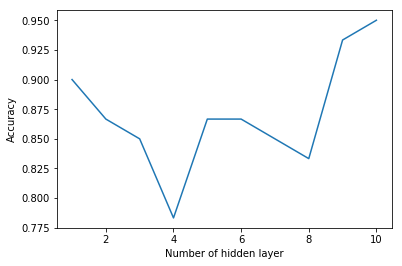

In [23]:
Nh_acc= np.array(Nh_acc)
plt.plot(Nh,Nh_acc[:,1])
plt.xlabel('Number of hidden layer')  
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

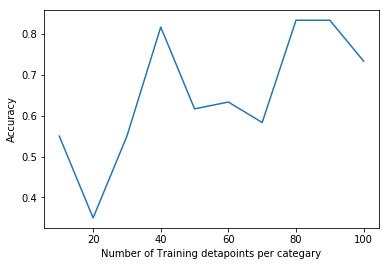

In [24]:
N_acc= np.array(N_acc)
plt.plot(N,N_acc[:,1])
plt.xlabel('Number of Training detapoints per categary')  
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

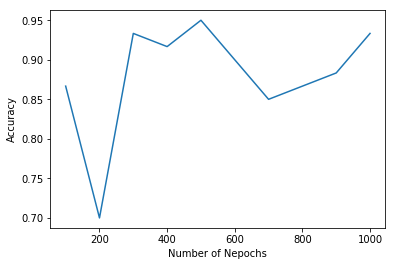

In [25]:
Nepochs_acc= np.array(Nepochs_acc)
plt.plot(Nepochs,Nepochs_acc[:,1])
plt.xlabel('Number of Nepochs')  
plt.ylabel('Accuracy')